<a href="https://colab.research.google.com/github/wangqy1216/Thesis/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip KDEF.zip

Archive:  KDEF.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of KDEF.zip or
        KDEF.zip.zip, and cannot find KDEF.zip.ZIP, period.


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2020-09-16 17:01:42--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  16%[==>                 ]   9.94M   103KB/s    in 2m 33s  

2020-09-16 17:04:15 (66.4 KB/s) - Connection closed at byte 10419496. Retrying.

--2020-09-16 17:04:16--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 53620601 (51M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[+++================>]  61.07M  2.38MB/s    in 4m 30s  

2020-09-16 17:08:46 (194 KB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/640400

In [ ]:
from skimage import io
import cv2
from imutils import face_utils
import dlib
from google.colab.patches import cv2_imshow
import os
import glob

Test

In [ ]:
image = io.imread('KDEF/AF01/AF01AFS.JPG')

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
  
  if shape[0][0] != 0:
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0) , 2)
    # show the face number
    cv2.putText(gray, "Face #{}".format(i + 1), (x - 10, y - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0) , 2)
    for (x, y) in shape:
      cv2.circle(gray, (x, y), 2, (0, 0, 255) , 2)

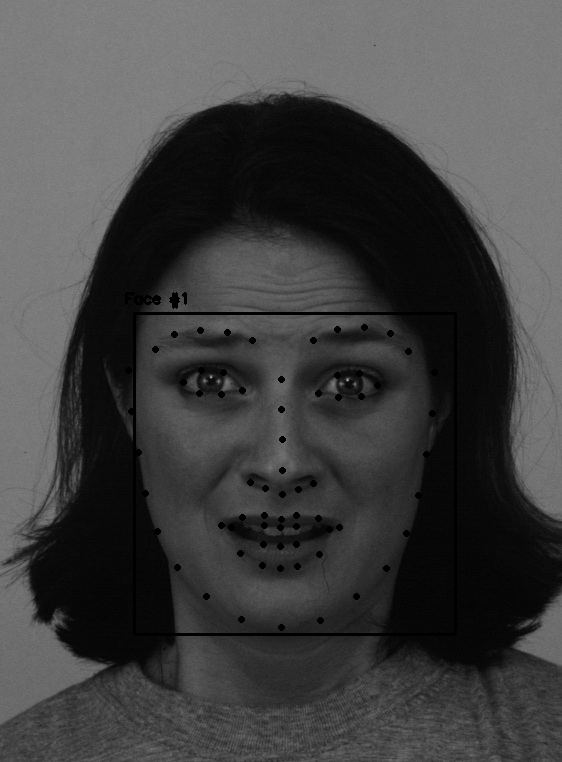

In [ ]:
cv2_imshow(gray)

Go through subdirectories and real all images

In [ ]:
data = []
labels = []

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
      
for path, subdirs, files in os.walk('KDEF'):
    for name in files:
        img_path = os.path.join(path, name)

        if (img_path.find('S.JPG') != -1):
          image = io.imread(img_path)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          # detect faces in the grayscale image
          rects = detector(gray, 1)

          if len(rects) != 0:
            shape = predictor(gray, rects[0])
            shape = face_utils.shape_to_np(shape)

            if shape[0][0] != 0:
              data.append(shape)
              labels.append(img_path[14:16])

In [ ]:
img_path[14:16]

'SA'

Feature Extraction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier 

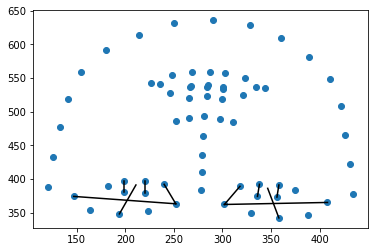

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

x = []
y = []

for i, j in data[0]:
  x.append(i)
  y.append(j)

plt.scatter(x, y)

line = lines.Line2D([data[0][22][0],data[0][26][0]],[data[0][22][1],data[0][26][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][17][0],data[0][21][0]],[data[0][17][1],data[0][21][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][24][0],(data[0][42][0] + data[0][45][0]) / 2],[data[0][24][1], (data[0][42][1] + data[0][45][1]) / 2],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][19][0],(data[0][36][0] + data[0][39][0]) / 2],[data[0][19][1], (data[0][36][1] + data[0][39][1]) / 2],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][22][0],data[0][42][0]],[data[0][22][1],data[0][42][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][21][0],data[0][39][0]],[data[0][21][1],data[0][39][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][43][0],data[0][47][0]],[data[0][43][1],data[0][47][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][44][0],data[0][46][0]],[data[0][44][1],data[0][46][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][38][0],data[0][40][0]],[data[0][38][1],data[0][40][1]],linestyle='-',color='k')
plt.axes().add_line(line)
line = lines.Line2D([data[0][37][0],data[0][41][0]],[data[0][37][1],data[0][41][1]],linestyle='-',color='k')
plt.axes().add_line(line)

In [ ]:
import math

def feature_extractor(data):

  horizental_norm_distance = math.sqrt( ((data[0][0] - data[16][0])**2) + ((data[0][1] - data[16][1])**2) )
  vertical_norm_distance = math.sqrt( ((data[27][0] - data[8][0])**2) + ((data[27][1] - data[8][1])**2) )

  #Left Eyebrow Length
  left_eyebrow_length = math.sqrt( ((data[22][0] - data[26][0])**2) + ((data[22][1] - data[26][1])**2) )
  #Right Eyebrow Length
  right_eyebrow_length = math.sqrt( ((data[17][0] - data[21][0])**2) + ((data[17][1] - data[21][1])**2) )

  #Left Outer Eyebrow Height
  left_outer_eyebrow_height = math.sqrt( ((data[24][0] - (data[42][0] + data[45][0]) / 2)**2) + ((data[24][1] - (data[42][1] + data[45][1]) / 2)**2) )
  #Right Outer Eyebrow Height
  right_outer_eyebrow_height = math.sqrt( ((data[19][0] - (data[36][0] + data[39][0]) / 2)**2) + ((data[19][1] - (data[36][1] + data[39][1]) / 2)**2) )

  #Left Inner Eyebrow Height
  left_inner_eyebrow_height = math.sqrt( ((data[22][0] - data[42][0])**2) + ((data[22][1] - data[42][1])**2) )
  #Right Inner Eyebrow Height
  right_inner_eyebrow_height = math.sqrt( ((data[21][0] - data[39][0])**2) + ((data[21][1] - data[39][1])**2) )

  #Left Eye Height
  left_eye_height = math.sqrt( ((data[43][0] - data[47][0])**2) + ((data[43][1] - data[47][1])**2) ) + math.sqrt( ((data[44][0] - data[46][0])**2) + ((data[44][1] - data[46][1])**2) )
  #Right Eye Height
  right_eye_height = math.sqrt( ((data[38][0] - data[40][0])**2) + ((data[38][1] - data[40][1])**2) ) + math.sqrt( ((data[37][0] - data[41][0])**2) + ((data[37][1] - data[41][1])**2) )

  #Mouth Height
  mouth_height = math.sqrt( ((data[62][0] - data[66][0])**2) + ((data[62][1] - data[66][1])**2) )

  #Mouth Width
  mouth_width = math.sqrt( ((data[48][0] - data[54][0])**2) + ((data[48][1] - data[54][1])**2) )

  #Left Lip Height
  left_lip_height = math.sqrt( ((data[47][0] - data[54][0])**2) + ((data[47][1] - data[54][1])**2) )

  #Right Lip Height
  right_lip_height = math.sqrt( ((data[48][0] - data[40][0])**2) + ((data[48][1] - data[40][1])**2) )

  #Upper Lip Height
  upper_lip_height = math.sqrt( ((data[51][0] - data[33][0])**2) + ((data[51][1] - data[33][1])**2) )

  #Jaw Height
  jaw_height = math.sqrt( ((data[8][0] - data[33][0])**2) + ((data[8][1] - data[33][1])**2) )

  return [left_eyebrow_length / horizental_norm_distance, 
          right_eyebrow_length / horizental_norm_distance, 
          left_outer_eyebrow_height / vertical_norm_distance, 
          right_outer_eyebrow_height / vertical_norm_distance, 
          left_inner_eyebrow_height / vertical_norm_distance, 
          right_inner_eyebrow_height / vertical_norm_distance, 
          left_eye_height / vertical_norm_distance, 
          right_eye_height / vertical_norm_distance, 
          mouth_height / vertical_norm_distance, 
          mouth_width / horizental_norm_distance, 
          left_lip_height / vertical_norm_distance, 
          right_lip_height / vertical_norm_distance, 
          upper_lip_height / vertical_norm_distance, 
          jaw_height / vertical_norm_distance]

  # return [left_eyebrow_length, 
  #         right_eyebrow_length, 
  #         left_outer_eyebrow_height, 
  #         right_outer_eyebrow_height, 
  #         left_inner_eyebrow_height, 
  #         right_inner_eyebrow_height, 
  #         left_eye_height, 
  #         right_eye_height, 
  #         mouth_height, 
  #         mouth_width, 
  #         left_lip_height, 
  #         right_lip_height, 
  #         upper_lip_height, 
  #         jaw_height]

In [ ]:
features = []
for ele in data:
  features.append(feature_extractor(ele))

SVM

In [ ]:
def labels_to_nums(labels):
  for i, label in enumerate(labels):
    if label == 'AF':
      labels[i] = 0
    if label == 'AN':
      labels[i] = 1
    if label == 'DI':
      labels[i] = 2
    if label == 'HA':
      labels[i] = 3
    if label == 'NE':
      labels[i] = 4
    if label == 'SA':
      labels[i] = 5
    if label == 'SU':
      labels[i] = 6
  return labels

In [ ]:
labels = labels_to_nums(labels)

In [ ]:
len(features)

980

In [ ]:
len(labels)

980

In [ ]:
train_features = features
train_labels = labels

In [ ]:
import numpy as np
X = np.array(train_features)
y = np.array(train_labels)
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
test_features = features
test_labels = labels

In [ ]:
output = clf.predict(test_features)

In [ ]:
counter = 0

for i in range(len(output)):
  if output[i] == test_labels[i]:
    counter += 1

In [ ]:
counter

752

In [ ]:
752 / 980

0.7673469387755102

DNN

In [ ]:
import tensorflow as tf

def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a one-dimensional 14*1 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(14,)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=7, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


In [ ]:
learning_rate = 0.02
epochs = 500
batch_size = 32
validation_split = 0.1

In [ ]:
model = create_model(learning_rate)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 14)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               3840      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 5,639
Trainable params: 5,639
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd

In [ ]:
def train_model(model, train_features, train_labels, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_labels, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

In [ ]:
features = np.array(features)
labels = np.array(labels)

In [ ]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [ ]:
len(features)

980

In [ ]:
def split_dataset(features, labels):
  size = len(features)

  idx_range = np.arange(0, size)
  np.random.shuffle(idx_range)

  train_features = []
  train_labels = []

  test_features = []
  test_labels = []

  for i in range(idx_range.size):
    if i < 9/10 * len(idx_range):
      train_features.append(features[i])
      arr = np.zeros(7)
      arr[labels[i]] = 1
      train_labels.append(arr)
    else:
      test_features.append(features[i])
      arr = np.zeros(7)
      arr[labels[i]] = 1
      test_labels.append(arr)

  return np.array(train_features), np.array(train_labels), np.array(test_features), np.array(test_labels)

In [ ]:
train_features, train_labels, test_features, test_labels = split_dataset(features, labels)

In [ ]:
# Train the model on the normalized training set.
epochs, hist = train_model(model, train_features, train_labels, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
model.evaluate(x=test_features, y=test_labels)

Epoch 1/500


InvalidArgumentError: ignored

In [ ]:
pred = model(test_features)
pred = np.array(pred)

In [ ]:
pred

array([[0.15295972, 0.12327085, 0.14172977, 0.1416537 , 0.13861118,
        0.15701756, 0.14475717],
       [0.15205564, 0.12165371, 0.14529155, 0.1468645 , 0.13841188,
        0.15278198, 0.14294074],
       [0.15316156, 0.12492982, 0.1441875 , 0.13903464, 0.1430224 ,
        0.15187015, 0.14379399],
       [0.15241225, 0.12436691, 0.14246331, 0.1434955 , 0.13778412,
        0.15593992, 0.14353795],
       [0.15182579, 0.12191356, 0.14272086, 0.1434522 , 0.13898389,
        0.15572992, 0.1453738 ],
       [0.15132369, 0.12271351, 0.14374705, 0.14466877, 0.13863187,
        0.15436088, 0.14455424],
       [0.15221916, 0.12207298, 0.14439343, 0.14453544, 0.1401226 ,
        0.15322451, 0.14343187],
       [0.15226534, 0.12053256, 0.14432217, 0.144642  , 0.13811499,
        0.15527317, 0.14484982],
       [0.1545915 , 0.12307744, 0.14543673, 0.14254682, 0.141979  ,
        0.15006064, 0.14230785],
       [0.15388282, 0.12374587, 0.14487159, 0.14173128, 0.14177623,
        0.15099373, 0.1

In [ ]:
test_labels

array([2, 6, 3, 1, 5, 4, 0, 1, 0, 3, 4, 6, 2, 5, 0, 4, 2, 5, 3, 6, 1, 3,
       4, 0, 1, 2, 6, 5, 4, 1, 0, 5, 3, 2, 6, 4, 0, 3, 2, 1, 5, 6, 3, 5,
       6, 4, 2, 1, 0, 0, 5, 4, 3, 2, 1, 6, 2, 1, 4, 3, 6, 0, 5, 3, 6, 5,
       4, 2, 1, 0, 0, 3, 5, 4, 6, 2, 1, 6, 3, 5, 2, 4, 1, 0, 5, 2, 3, 0,
       4, 1, 6, 4, 2, 6, 1, 5, 3, 0])

In [ ]:
pred.shape

(98, 7)

In [ ]:
pred_labels

array([4., 5., 1., 1., 3., 6., 0., 2., 1., 6., 3., 4., 5., 6., 2., 2., 6.,
       0., 3., 5., 4., 0., 3., 4., 4., 1., 5., 6., 0., 4., 6., 2., 5., 1.,
       3., 4., 6., 6., 5., 3., 4., 1., 4., 5., 2., 0., 1., 6., 3., 2., 1.,
       4., 3., 6., 5., 6., 4., 6., 0., 1., 3., 5., 2., 4., 6., 1., 2., 3.,
       2., 3., 4., 1., 6., 5., 4., 3., 0., 3., 5., 4., 5., 0., 5., 4., 5.,
       3., 1., 1., 6., 4., 6., 5., 0., 5., 5., 0., 3., 3.])

In [ ]:
for i in range(len(pred)):
  pred_labels[i] = np.argmax(pred[i])

In [ ]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(test_labels, pred_labels)

In [ ]:
matrix

array([[ 9,  0,  0,  1,  0,  0,  4],
       [ 0, 10,  1,  1,  2,  0,  0],
       [ 0,  3,  7,  0,  2,  2,  0],
       [ 0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  2,  0],
       [ 0,  0,  1,  0,  0, 13,  0],
       [ 1,  0,  0,  0,  1,  0, 12]])

Process Video

In [ ]:
#Retinex algorithm
def replaceZeroes(data):
    min_nonzero = min(data[np.nonzero(data)])
    data[data == 0] = min_nonzero
    return data

def SSR(src_img, size):
    L_blur = cv2.GaussianBlur(src_img, (size, size), 0)
    img = replaceZeroes(src_img)
    L_blur = replaceZeroes(L_blur)

    dst_Img = cv2.log(img/255.0)
    dst_Lblur = cv2.log(L_blur/255.0)
    dst_IxL = cv2.multiply(dst_Img,dst_Lblur)
    log_R = cv2.subtract(dst_Img, dst_IxL)

    dst_R = cv2.normalize(log_R,None,0,255,cv2.NORM_MINMAX)
    log_uint8 = cv2.convertScaleAbs(dst_R)
    return log_uint8

def MSR(img, scales):
    weight = 1 / 3.0
    scales_size = len(scales)
    h, w = img.shape[:2]
    log_R = np.zeros((h, w), dtype=np.float32)

    for i in range(scales_size):
        img = replaceZeroes(img)
        L_blur = cv2.GaussianBlur(img, (scales[i], scales[i]), 0)
        L_blur = replaceZeroes(L_blur)
        dst_Img = cv2.log(img/255.0)
        dst_Lblur = cv2.log(L_blur/255.0)
        dst_Ixl = cv2.multiply(dst_Img, dst_Lblur)
        log_R += weight * cv2.subtract(dst_Img, dst_Ixl)

    dst_R = cv2.normalize(log_R,None, 0, 255, cv2.NORM_MINMAX)
    log_uint8 = cv2.convertScaleAbs(dst_R)
    return log_uint8

In [ ]:
import numpy as np
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture('dark.mov')

count = 0
results = []
expressions = []
size = 3

while(cap.isOpened()):
    ret, frame = cap.read()
    expressions.append(4)

    b_gray, g_gray, r_gray = cv2.split(frame)
    b_gray = SSR(b_gray, size)
    g_gray = SSR(g_gray, size)
    r_gray = SSR(r_gray, size)
    new_frame = cv2.merge([b_gray, g_gray, r_gray])

    gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
   
      
      if shape[0][0] != 0:
        prediction = clf.predict([feature_extractor(shape)])
        expressions[count] = prediction

        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0) , 2)
        # show the face number
        cv2.putText(frame, "Face #{}".format(i + 1), (x - 10, y - 10),
          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0) , 2)
        cv2.putText(frame, "Expression #{}".format(prediction + 1), (x + 10, y + 10),
          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0) , 2)
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 0, 255) , 2)

        
    results.append(frame)

    count = count + 1

cap.release()
cv2.destroyAllWindows()

ValueError: ignored

In [ ]:
height, width, layers = results[0].shape
size = (width,height)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(results)):
    out.write(results[i])

In [ ]:
len(results)

1363

In [ ]:
len(expressions)

1364

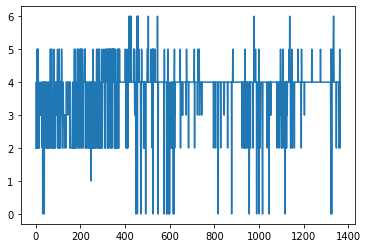

In [ ]:
import matplotlib.pyplot as plt

plt.plot(expressions)

In [ ]:
size = 3

b_gray, g_gray, r_gray = cv2.split(results[10])
b_gray = SSR(b_gray, size)
g_gray = SSR(g_gray, size)
r_gray = SSR(r_gray, size)
processed = cv2.merge([b_gray, g_gray, r_gray])

gray = cv2.cvtColor(processed, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

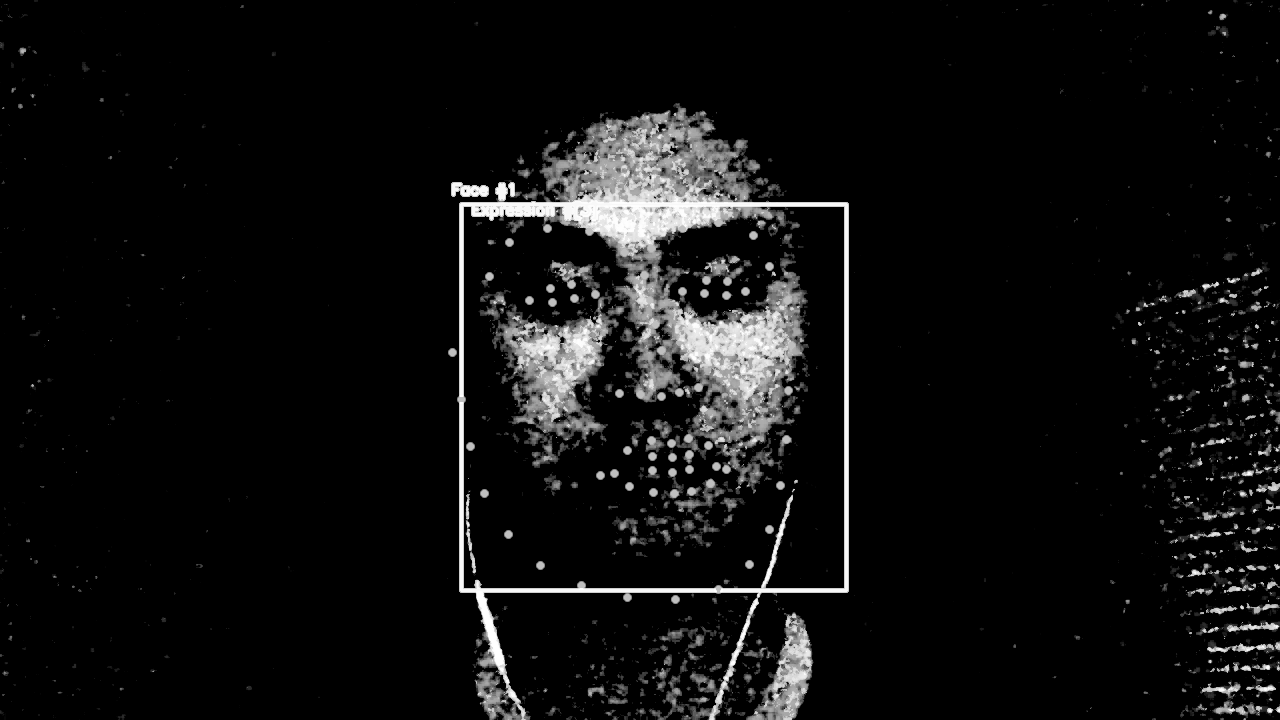

In [ ]:
cv2_imshow(gray)

Scripts

In [ ]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
tf.enable_v2_behavior()

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 2s 4ms/step - loss: 0.3586 - accuracy: 0.9011 - val_loss: 0.1894 - val_accuracy: 0.9441
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.9531 - val_loss: 0.1358 - val_accuracy: 0.9592
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9665 - val_loss: 0.1106 - val_accuracy: 0.9673
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9744 - val_loss: 0.0981 - val_accuracy: 0.9707
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9790 - val_loss: 0.0864 - val_accuracy: 0.9742
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0872 - val_accuracy: 0.9741
